#**Regresión Lineal Datos Ecommerce**

Descripción:

Se tiene datos de una compañia Ecommerce que vende ropa online.  Esta empresa también tiene un servicio de consejería o personal Stylist. Se puede ordenar las ropas que se deseen, a través de App o Web.

La empresa quiere decidir si enfocarse en la experiencia de la APP o en la web, en base a los datos de clientes. La variable a predecir es **Yearly Amount Spent**.

## Importar librerias

**Importar pandas, numpy, matplotlib, y seaborn. Colocar %matplotlib inline**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Obtener los datos

Se trabajará con el archivo de clientes de la compañia. La información que se tiene es de Email, Dirección, etc. Pero también tiene variables numéricas:

* Avg. Session Length: Promedio de sesiones en las tiendas para consejería.
* Time on App: Tiempo promedio gastado en la APP en minutos.
* Time on Website: Tiempo promedio gastado en el website en minutos.
* Length of Membership: Cuantos años el cliente ha sido miembro.

**Lee el archivo csv (Ecommerce_Customers.csv) de clientes en un Dataframe llamado clientes.**

In [2]:
url = "https://raw.githubusercontent.com/eduardool/MaestriaCienciaDatos/main/datasets/Ecommerce_Customers.csv"


In [3]:
datos = pd.read_csv(url)

**Mostrar el encabezado de clientes, verificar sus métodos info() y describe().**

In [4]:
datos.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Análisis Exploratorio de Datos



Para el resto del ejercicio solo usar los datos numéricos del archivo CSV.
___
**Usar seaborn para crear un jointplot que compare las columnas  Time on Website y Yearly Amount Spent. La correlación tiene sentido?**

In [7]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

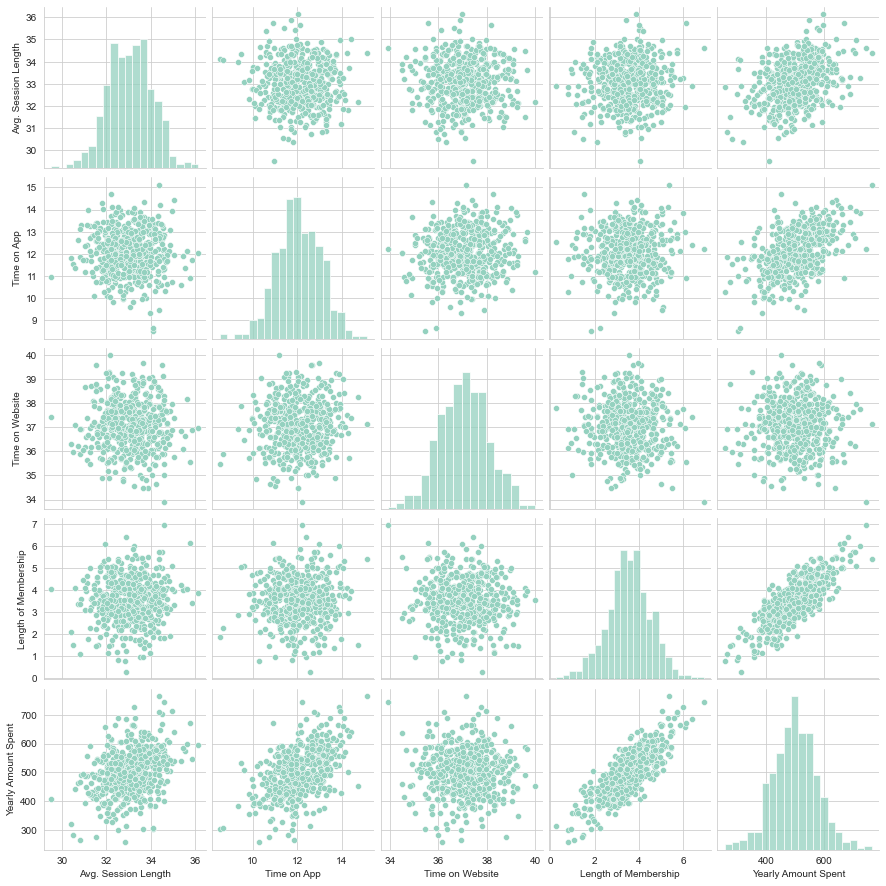

In [8]:
sns.pairplot(datos)

**Hacer lo mismo pero con la columna Time on App.**

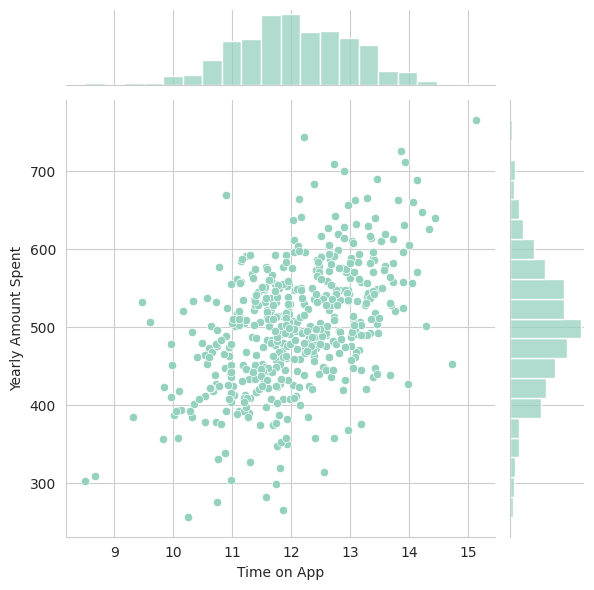

**Explora estos tipos de relaciones sobre el conjunto de datos entero. Usar [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) para recrear el gráfico abajo.**

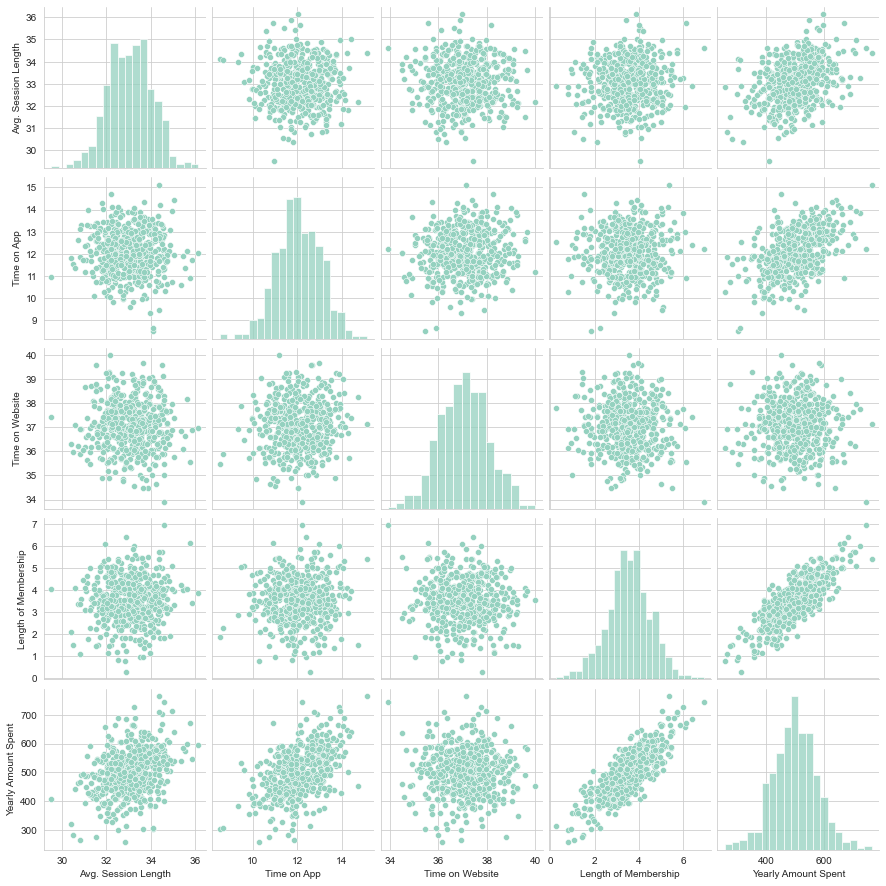

In [19]:
sns.pairplot(datos)

**Basado en el gráfico cual sería la características más correlacionada con Yearly Amount Spent?**

<AxesSubplot:>

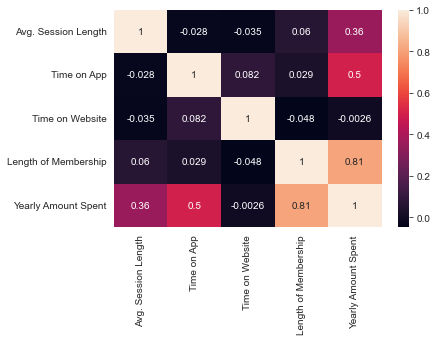

In [10]:
sns.heatmap(datos.corr(), annot=True)

In [9]:
datos.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


**Crear un grafo de modelo lineal (usando lmplot de seaborn) de  Yearly Amount Spent vs. Length of Membership.**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Length of Membership'>

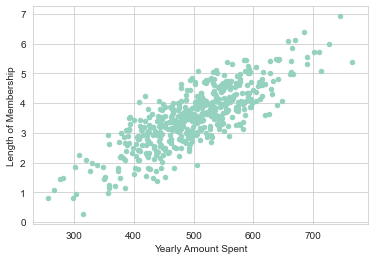

In [18]:
datos.plot(kind="scatter", x="Yearly Amount Spent", y="Length of Membership")
#datos.plot(kind="plot", x="Yearly Amount Spent", y="Length of Membership")


#datos.scatterplot(x="Yearly Amount Spent", y="Length of Membership", color='blue', label='Datos')


## Datos de entrenamiento y prueba

**Define la variable X como las características numéricas de clientes, la variable $y$ igual a la columna "Yearly Amount Spent" column.**

In [20]:
datos.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [30]:
X = datos[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = datos['Yearly Amount Spent']

In [31]:
from sklearn.model_selection import train_test_split

**Usar model_selection.train_test_split de sklearn para dividir los datos en conjuntos de entrenamiento y prueba. Definir el test_size=0.3 y random_state=101**

In [32]:
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.3, random_state=101)

In [33]:
X_entrenamiento.shape

(350, 4)

In [34]:
X_prueba.shape

(150, 4)

## Entrenamiento del modelo

Usando datos de entrenamiento

**Importar LinearRegression de sklearn.linear_model**

In [35]:
from sklearn.linear_model import LinearRegression

**Crear una instancia de un modelo LinearRegression() llamado lm.**


In [36]:
lm = LinearRegression()

**Entrenar(fit) lm usando los datos de entrenamiento.**

In [37]:
lm.fit(X_entrenamiento,y_entrenamiento) # aprendizaje ML

LinearRegression()

**Imprimir los coeficientes (parámetros del modelo)**

In [38]:
# imprimir $\theta_0$
print(lm.intercept_)

-1047.932782250239


,Parámetros
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Predecir datos de prueba

Dado el modelo entrenado, evaluar su desempeño en el conjunto de prueba.

**Usar lm.predict() para predecir el conjunto X_prueba.**

In [40]:
predicciones = lm.predict(X_prueba)

**Crear un scatterplot de los valores de prueba reales versus
valores predichos.**

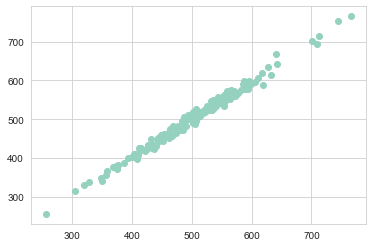

In [41]:
plt.scatter(y_prueba,predicciones)

## Evaluación del modelo



**Calcula las métricas  MAE, MSE, y RMSE.**

In [43]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_prueba, predicciones))
print('MSE:', metrics.mean_squared_error(y_prueba, predicciones))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_prueba, predicciones)))

MAE: 7.228148653430832
MSE: 79.81305165097456
RMSE: 8.93381506697864


## Residuos


**Graficar un histograma de los residuos para tener la seguridad que están normalmente distribuidos. Usar distplot de seaborn, o plt.hist().**

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


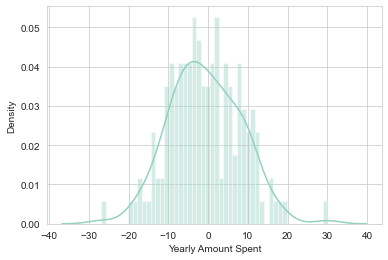

In [42]:
sns.distplot((y_prueba-predicciones),bins=50);

## Conclusión
Se enfocará en el app o en el website? o eso no importa y Membership Time es lo relevante?

**Producir el dataframe:**

In [45]:
params_df = pd.DataFrame(lm.coef_,X.columns,columns=['Parámetros'])
params_df

,Parámetros
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**Cómo se interpretan estos parámetros / coeficientes?**

Interpretando los coeficientes / parámetros:

- Asumiendo todas las características fijas, el incremento en una unidad en **Avg. Session Length** está asociado con  con un **incremento de \$25.98**.
- Asumiendo todas las características fijas, el incremento en una unidad en  **Time on App** está asociado con un **incremento de \$38.590159**.
- Asumiendo todas las características fijas, el incremento en una unidad en   **Time on Website** está asociado con un **incremento de\$0.190405**.
- Asumiendo todas las características fijas, el incremento en una unidad en   **Length of Membershi** está asociado con un **incremento de \$61.279097**.


**Debe enfocarse más en la APP o en el website?**

app